<a href="https://colab.research.google.com/github/Pedrocabrerahub/Proyecto-Final-Text-Mining/blob/main/Proyecto_Final_TM_Ejercicio_1_y_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

## Conexión a Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Proyecto Final TM/tw_source.csv')

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 232719-232720: invalid continuation byte

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Proyecto Final TM/tw_source.csv',
                    encoding = 'latin_1', header=None)
dataset.columns = ['valor', 'id', 'fecha', 'fuente', 'usuario', 'tweet']
dataset.head()

,valor,id,fecha,fuente,usuario,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
dataset.shape

(1600000, 6)

In [ ]:
dataset.loc[50000,'tweet'].split(' ')

['Oh',
 'epic',
 'work',
 'fail.',
 'Also',
 'KAs',
 'still',
 'need',
 'to',
 'be',
 'incinerated',
 'and',
 'doctors',
 'suck',
 '']

In [ ]:
for palabra in dataset.loc[1000,'tweet'].split(' '):
  if('@' in palabra):
    print(palabra)

@JonathanRKnight
@silver_tulip27


In [ ]:
a= [1,2,3,4]

for i in a:
  print(i**2)

1
4
9
16


In [ ]:
lista_menciones = []
filas_per_at= {}
cont = 0

for tweet in dataset['tweet']:
 ats_in_tweet=[palabra for palabra in tweet.split(' ') if '@' in palabra]
 lista_menciones.extend(ats_in_tweet)

 try:
  ultimo_at=ats_in_tweet[len(ats_in_tweet) -1]
  filas_per_at.setdefault(ultimo_at,[]).append (cont)
 except:
  pass
 finally:
  cont = cont + 1


In [ ]:
lista_menciones

['@switchfoot',
 '@Kenichan',
 '@nationwideclass',
 '@Kwesidei',
 '@LOLTrish',
 '@Tatiana_K',
 '@twittera',
 '@caregiving',
 '@octolinz16',
 '@smarrison',
 '@iamjazzyfizzle',
 '@iamlilnicki',
 '@LettyA',
 '@FakerPattyPattz',
 '@alydesigns',
 '@angry_barista',
 '@alielayus',
 '@julieebaby',
 '@HumpNinja',
 '@cocomix04',
 '@MissXu',
 '@fleurylis',
 '@JonathanRKnight',
 '@Viennah',
 "@jeancjumbe's",
 '@tea',
 '@localtweeps',
 '@andywana',
 '@oanhLove',
 '@BatManYNG',
 '@Starrbby',
 '@katortiz',
 '@Lt_Algonquin',
 '@jdarter',
 '@ninjen',
 '@ashleyac',
 '@statravelAU',
 '@markhardy1974',
 '@msdrama',
 '@januarycrimson',
 '@Hollywoodheat',
 '@makeherfamous',
 '@stark',
 '@mangaaa',
 '@kpreyes',
 '@paradisej',
 '@Henkuyinepu',
 '@marykatherine_q',
 '@jacobsummers',
 '@Alliana07',
 '@salancaster',
 '@mercedesashley',
 '@HibaNick',
 '@eRRe_sC',
 '@allyheman',
 '@grum',
 '@thecoolestout',
 '@chelserlynn',
 '@Knights_',
 '@BridgetsBeaches',
 '@JonathanRKnight',
 '@ozesteph1992',
 '@mrsaintnick',


In [ ]:
contador_menciones= Counter(lista_menciones)
contador_menciones.most_common(4)[1:]

[('@mileycyrus', 4310), ('@tommcfly', 3837), ('@ddlovato', 3349)]

In [ ]:
filas_mileycyrus = filas_per_at['@mileycyrus']
corpus_mileycyrus = dataset.iloc[filas_mileycyrus, [1,2,5]]
corpus_mileycyrus

,id,fecha,tweet
1021,1468063101,Mon Apr 06 23:30:57 PDT 2009,@mileycyrus hahaha dont be like that one time ...
2014,1468286517,Tue Apr 07 00:45:20 PDT 2009,"@mileycyrus i have the same problem, but it's ..."
2073,1468297110,Tue Apr 07 00:49:07 PDT 2009,@mileycyrus I guess counting sheep didn't work...
2080,1468298918,Tue Apr 07 00:49:44 PDT 2009,@mileycyrus I would too if it meant spending a...
2156,1468318249,Tue Apr 07 00:56:41 PDT 2009,@mileycyrus AWWW u seriously have the cutest d...
...,...,...,...
1595291,2192336083,Tue Jun 16 06:52:58 PDT 2009,Hey @mileycyrus I voted for you at the teen ch...
1596796,2192768714,Tue Jun 16 07:31:21 PDT 2009,@mileycyrus http://twitpic.com/7f5fy - I love ...
1597905,2193052811,Tue Jun 16 07:55:55 PDT 2009,@mileycyrus i see the photos of your KISS iss ...
1598348,2193155701,Tue Jun 16 08:04:20 PDT 2009,@mileycyrus i am definitley definitley getting...


In [ ]:
filas_tommcfly = filas_per_at['@tommcfly']
corpus_tommcfly = dataset.iloc[filas_tommcfly, [1,2,5]]
corpus_tommcfly

,id,fecha,tweet
1789,1468233211,Tue Apr 07 00:26:52 PDT 2009,@tommcfly Good morning Tom! Why can't I send y...
2514,1468391638,Tue Apr 07 01:23:07 PDT 2009,@tommcfly did you know that johnsons baby use ...
3029,1468502040,Tue Apr 07 02:03:41 PDT 2009,"@dougiemcfly @tommcfly good morning guys, how ..."
3524,1468618787,Tue Apr 07 02:46:02 PDT 2009,"@tommcfly hey, no chance of adding brighton or..."
3783,1468674970,Tue Apr 07 03:05:49 PDT 2009,"@tommcfly have fun tom, i need to buy eclipse ..."
...,...,...,...
1594946,2192269225,Tue Jun 16 06:46:41 PDT 2009,@tommcfly you should record Star Girl with JB
1595131,2192311895,Tue Jun 16 06:50:40 PDT 2009,@tommcfly why you at the studio then? just wa...
1595194,2192315339,Tue Jun 16 06:50:59 PDT 2009,@tommcfly Gonna make a trip to England in the ...
1597053,2192836467,Tue Jun 16 07:37:16 PDT 2009,@tommcfly Heya Tom! You should follow Peter Fa...


In [ ]:
filas_ddlovato = filas_per_at['@ddlovato']
corpus_ddlovato = dataset.iloc[filas_ddlovato, [1,2,5]]
corpus_ddlovato

,id,fecha,tweet
573,1467953367,Mon Apr 06 22:58:30 PDT 2009,@ddlovato Do you hate us?? Please don't
7032,1469661950,Tue Apr 07 07:02:58 PDT 2009,@ddlovato Wish that i could see it.. Thats th...
7089,1469674492,Tue Apr 07 07:05:11 PDT 2009,"@ddlovato hey demi, wen are you and selena gon..."
8611,1548280868,Fri Apr 17 20:31:31 PDT 2009,@ddlovato ahhhh i wish i could go to the dalla...
9492,1548773731,Fri Apr 17 21:56:12 PDT 2009,@ddlovato I just saw your tour dates and now I...
...,...,...,...
1590266,2191372145,Tue Jun 16 05:08:09 PDT 2009,@ddlovato is there a deluxe edition cause then...
1590351,2191386240,Tue Jun 16 05:09:58 PDT 2009,"@ddlovato Hahaha Demi, naughty Demi! I love y..."
1592766,2191807303,Tue Jun 16 06:00:23 PDT 2009,@ddlovato hope to see you soon
1593330,2191922960,Tue Jun 16 06:12:27 PDT 2009,@ddlovato I VOTED!! =]]] can't wait


In [ ]:
import spacy
import spacy.cli
import re

In [ ]:
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Normalización

In [ ]:
corpus = dataset['tweet']
corpus = corpus.reset_index()['tweet']
corpus.head()

,tweet
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,is upset that he can't update his Facebook by ...
2,@Kenichan I dived many times for the ball. Man...
3,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all...."


In [ ]:
def Normalizacion(documentos):
  new_corpus = []
  for doc in documentos:
    new_corpus.append(re.sub(r'[^a-zA-Z0-9\s{1}áéíóúüñÁÉÍÓÚ]', '', doc).lower().strip().rstrip('\n').rstrip('\r\n'))
  return new_corpus

In [ ]:
corpus = Normalizacion(corpus)

Cantidad de menciones por los 3 usuarios

In [ ]:
# Extraer las menciones para cada usuario
dataset['mentions'] = dataset['tweet'].apply(lambda x: re.findall(r'@\w+', x))

# Expandir las menciones
menciones = dataset.explode('mentions')

# Contar las menciones para cada uno de los usuarios
top_users = menciones['mentions'].value_counts().head(3)
print(top_users)

mentions
@mileycyrus    4500
@tommcfly      3887
@ddlovato      3467
Name: count, dtype: int64


## Creación de listas del top de los 3 usuarios

In [ ]:
# Crear la lista de los 3 usuarios más mencionados
top_usuarios = top_users.index.tolist()

# Realizar el filtro de los tweets que mencionan a los usuarios
corpus = {}

for user in top_usuarios:
    user_tweets = menciones[menciones['mentions'] == user]

    # Se crea el dataframe el cual va a contener el ID, fecha, tweet y longitud del tweet
    usuarios = user_tweets[['id', 'fecha', 'tweet']]
    usuarios['Length'] = usuarios['tweet'].apply(len)

    # En este paso se procede a guardar la información en el diccionario
    corpus[user] = usuarios

    # Mostrar la información
    print(f"Información para {user}:")
    print(usuarios.head(), "\n")

Información para @mileycyrus:
              id                         fecha  \
1021  1468063101  Mon Apr 06 23:30:57 PDT 2009   
2014  1468286517  Tue Apr 07 00:45:20 PDT 2009   
2073  1468297110  Tue Apr 07 00:49:07 PDT 2009   
2080  1468298918  Tue Apr 07 00:49:44 PDT 2009   
2156  1468318249  Tue Apr 07 00:56:41 PDT 2009   

                                                  tweet  Length  
1021  @mileycyrus hahaha dont be like that one time ...     107  
2014  @mileycyrus i have the same problem, but it's ...     137  
2073  @mileycyrus I guess counting sheep didn't work...      72  
2080  @mileycyrus I would too if it meant spending a...     100  
2156  @mileycyrus AWWW u seriously have the cutest d...     112   

Información para @tommcfly:
              id                         fecha  \
1690  1468210813  Tue Apr 07 00:19:09 PDT 2009   
1789  1468233211  Tue Apr 07 00:26:52 PDT 2009   
2514  1468391638  Tue Apr 07 01:23:07 PDT 2009   
3029  1468502040  Tue Apr 07 02:03:41 PDT 2

<ipython-input-60-75333720b07d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usuarios['Length'] = usuarios['tweet'].apply(len)
<ipython-input-60-75333720b07d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usuarios['Length'] = usuarios['tweet'].apply(len)
<ipython-input-60-75333720b07d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

Analisis contexto pa lematización, stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter

# Descargar recursos de NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Analisis para stopwords y lematizador

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

## Removemos Stopwords y aplicación de lematización

In [ ]:
def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalnum() and token.lower() not in stop_words]
    return tokens

# Guardado del contexto de cada usuario

In [ ]:
user_context = {}

# Extraer las palabras que se encuentran en la mencion de los usuarios
for user in top_users_list:
    user_tweets = corpus[user]['tweet'].tolist()
    context_words = []

    for tweet in user_tweets:
        tokens = preprocess_text(tweet)
        if user.strip('@') in tokens:
            user_index = tokens.index(user.strip('@'))
            context_words.extend(tokens[max(0, user_index-5):user_index])
            context_words.extend(tokens[user_index+1:min(len(tokens), user_index+4)])

    # Guardar la información en el diccionario
    user_context[user] = Counter(context_words)

# Mostrar la información
    print(f"Palabras más comunes para el usuario: {user}:")
    print(user_context[user].most_common(10), "\n")

Palabras más comunes para el usuario: @mileycyrus:
[('miley', 572), ('http', 490), ('love', 391), ('u', 207), ('good', 187), ('hey', 173), ('quot', 173), ('hope', 138), ('vote', 134), ('come', 132)] 

Palabras más comunes para el usuario: @tommcfly:
[('tom', 561), ('say', 190), ('http', 182), ('hey', 154), ('u', 147), ('please', 142), ('good', 138), ('love', 122), ('guy', 108), ('reply', 102)] 

Palabras más comunes para el usuario: @ddlovato:
[('demi', 430), ('love', 246), ('http', 182), ('u', 173), ('wish', 170), ('hey', 120), ('come', 114), ('hope', 109), ('im', 108), ('please', 104)] 



Mostrar  un  wordcloud  con  el  top  10  para  cada  usuario.

WordCloud para @mileycyrus


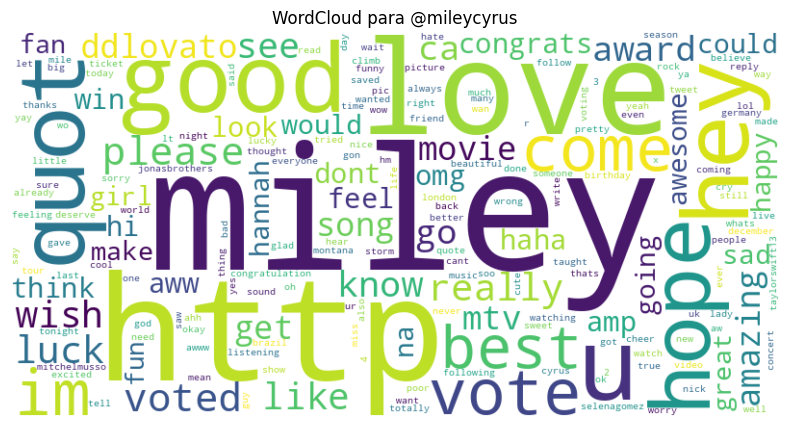

WordCloud para @tommcfly


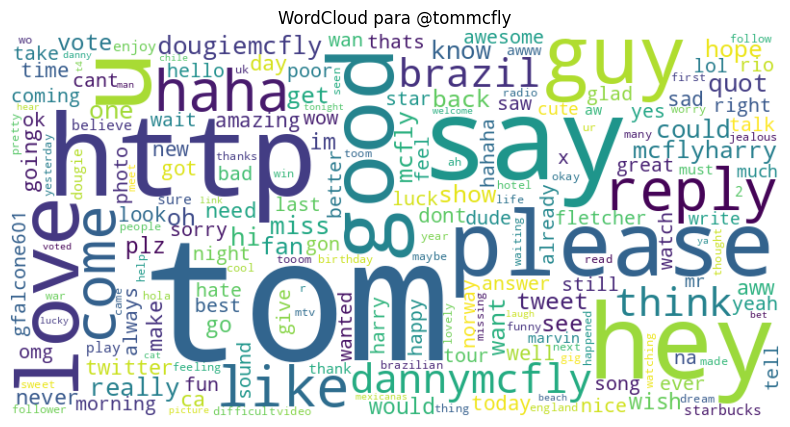

WordCloud para @ddlovato


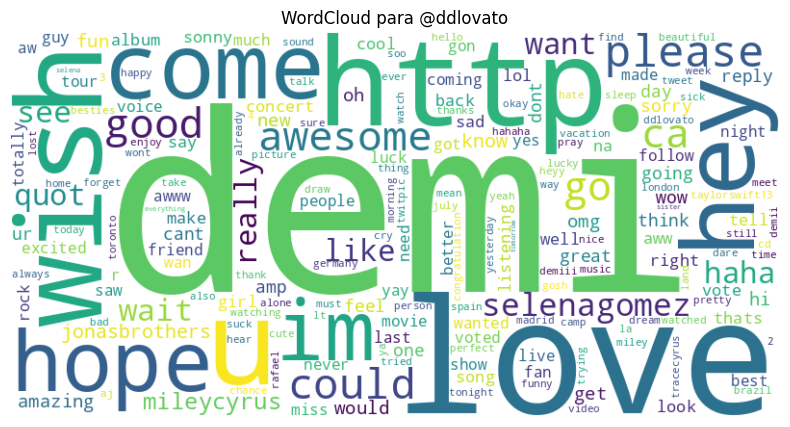

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generar y mostrar un WordCloud
def generate_wordcloud(context_counter, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(context_counter)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# WordClouds de los tres usuarios más populares
for user in top_users_list:
    print(f"WordCloud para {user}")
    generate_wordcloud(user_context[user], f"WordCloud para {user}")

Problema 2

In [1]:
base_path= '/content/drive/MyDrive/Proyecto Final 2 A/'

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
str_img= 'Test-train/FreshCarrott/freshCarrot (3).png'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array

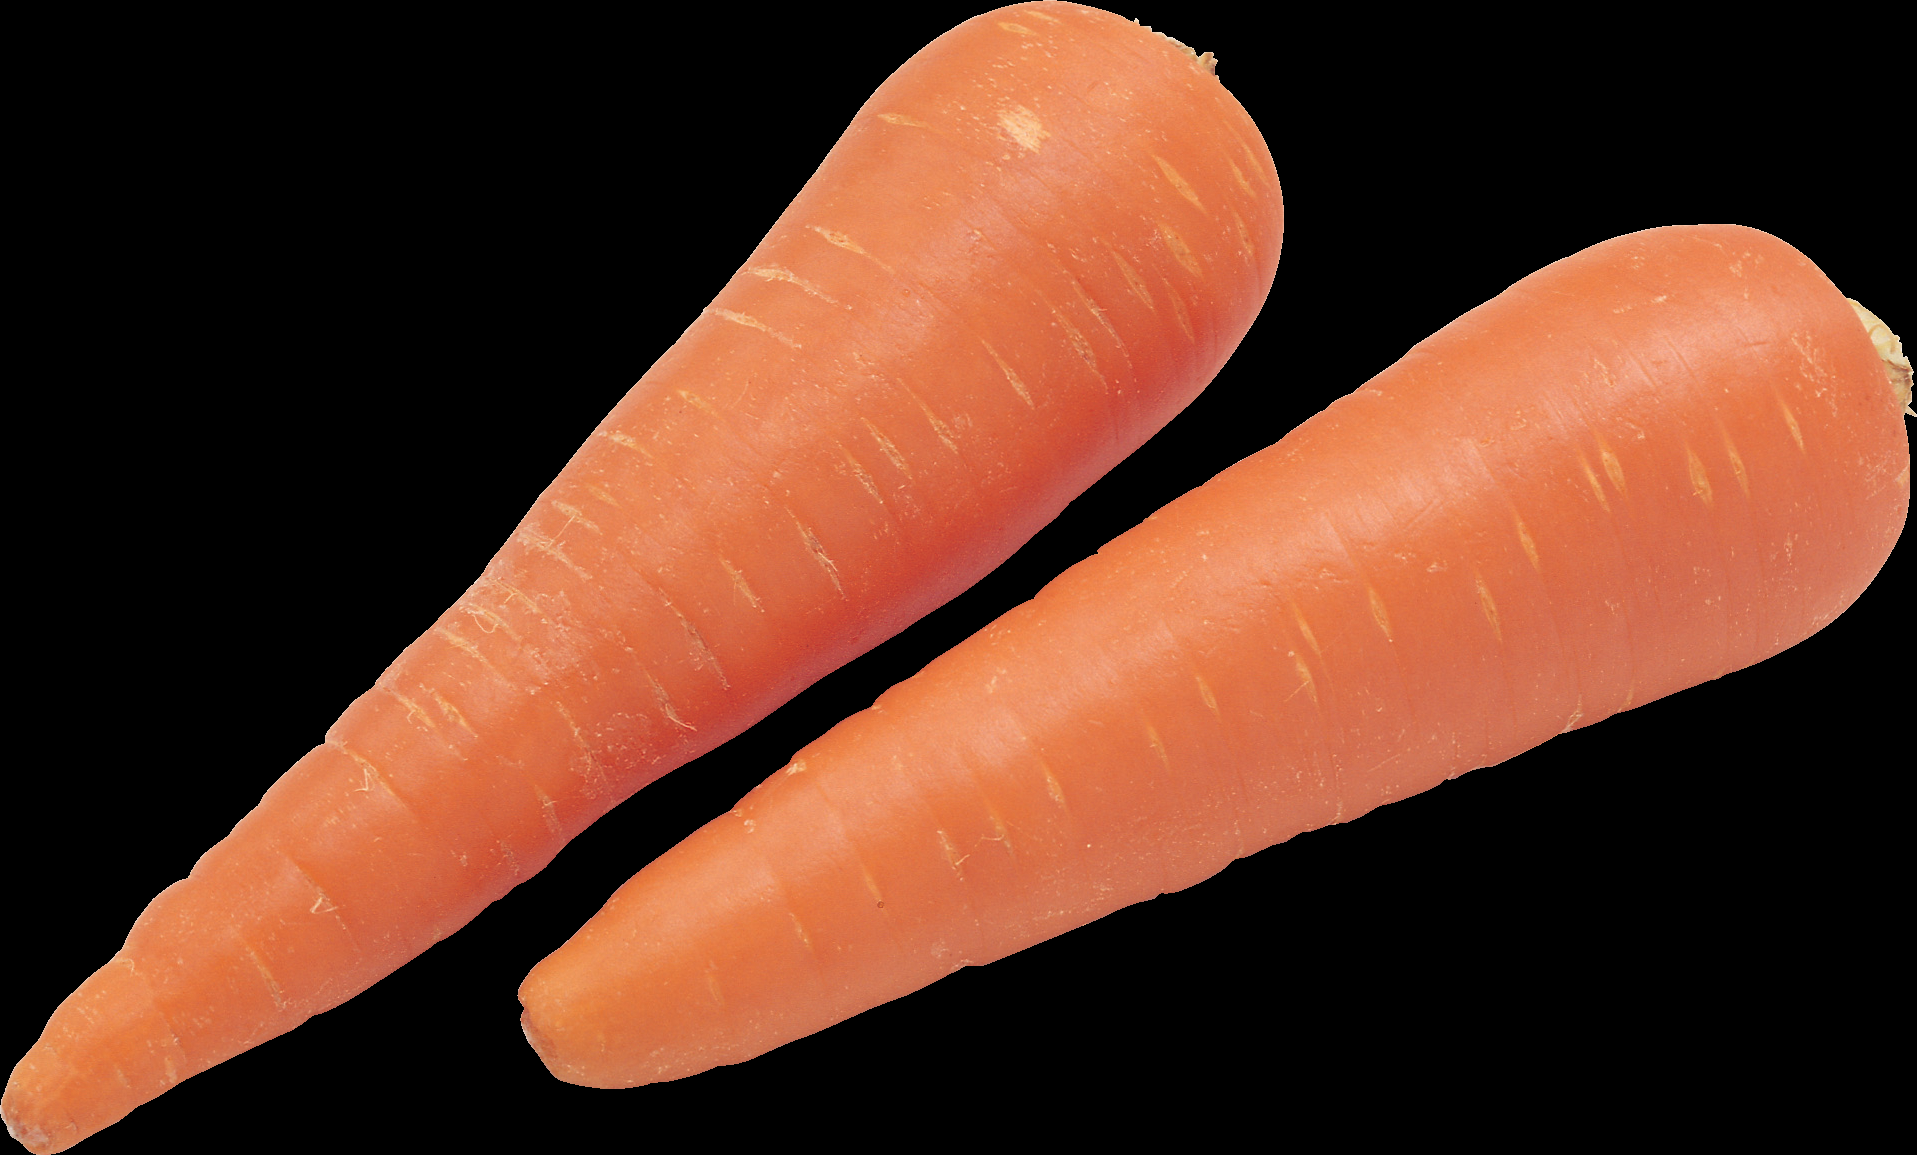

In [5]:
zanahoria_1 = load_img(base_path + str_img)
zanahoria_1

In [6]:
data_augmentation_process = ImageDataGenerator(
    rescale= 1/255.,
    zoom_range=0.3,
    horizontal_flip= True,
    vertical_flip= True,
    shear_range=0.5
)

In [7]:
img_temp = img_to_array(zanahoria_1)
img_temp = img_temp.reshape((1,) + img_temp.shape)

i=0
for img_instance in data_augmentation_process.flow(img_temp, batch_size=1, save_prefix='zanahoria_',
                                                   save_to_dir=base_path+'Previews/', save_format='png'):
  i = i + 1
  if (i > 10):
    break

Data Augmentation y Input Data Flow para Test

In [8]:
data_train_path = base_path + 'Test-train/' # path a datos de entramiento

# mecanismo para data augmetation para generar variaciones de imágenes originales
train_data_generator= ImageDataGenerator(
    rescale= 1/255.,
    zoom_range=0.3,
    horizontal_flip= True,
    vertical_flip= True,
    shear_range=0.5
)

train_data_flow = train_data_generator.flow_from_directory(
    directory=data_train_path,
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True,
    seed = 42
    )

Found 1627 images belonging to 3 classes.


Data Augmentation y Input Data Flow para Test

In [9]:
data_test_path = base_path + 'Test-Set/' # path a datos de entramiento

# mecanismo para data augmetation para generar variaciones de imágenes originales
test_data_generator= ImageDataGenerator(
    rescale= 1/255.,
)

test_data_flow = test_data_generator.flow_from_directory(
    directory=data_test_path,
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True,
    seed = 42

)

Found 599 images belonging to 3 classes.


Definimos Red Neuronao convolucional

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten

## Arquitectura de Red

In [11]:
cnn_v1= Sequential()

# Fase de Preprocesamiento
cnn_v1.add(Conv2D(input_shape =(64,64,3), filters=64, kernel_size=(3,3), activation='relu'))

cnn_v1.add(MaxPool2D(pool_size=(2,2)))

cnn_v1.add(Flatten())

cnn_v1.add(Dense(units=128, activation='relu'))

# If you have 3 classes, change the units back to 3
cnn_v1.add(Dense(units=3, activation='softmax')) # use softmax for multi-class classification

cnn_v1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
cnn_v1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
cnn_v1.fit(train_data_flow,
           steps_per_epoch=10,
           epochs=10,
           validation_steps=100,
           validation_data=test_data_flow)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.3241 - loss: 4.0980

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


10/10 ━━━━━━━━━━━━━━━━━━━━ 537s 49s/step - accuracy: 0.3270 - loss: 3.9888 - val_accuracy: 0.4190 - val_loss: 1.0328
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 65s 7s/step - accuracy: 0.5823 - loss: 0.8990 - val_accuracy: 0.4992 - val_loss: 1.0392
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.6900 - loss: 0.7442 - val_accuracy: 0.4491 - val_loss: 1.0065
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 55s 6s/step - accuracy: 0.6679 - loss: 0.7296 - val_accuracy: 0.5810 - val_loss: 0.7760
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.7365 - loss: 0.6276 - val_accuracy: 0.5943 - val_loss: 0.7860
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 569ms/step - accuracy: 0.8438 - loss: 0.5160 - val_accuracy: 0.6060 - val_loss: 0.7620
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 80s 5s/step - accuracy: 0.7806 - loss: 0.5462 - val_accuracy: 0.6010 - val_loss: 0.9160
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.7340 - loss: 0.6766 - val_accuracy: 0.6561 - val_loss: 0.7046

# Guardar Red Neuronal

In [25]:
cnn_v1.save('/content/drive/MyDrive/Proyecto Final 2 A/Models/cnn_v1.h5')

In [43]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [44]:
zanahoria_predict = cv2.imread('/content/drive/MyDrive/Proyecto Final 2 A/zanahoria.png')

if zanahoria_predict is None:
    print('Error: Could not load image.')
else:
    zanahoria_predict = cv2.cvtColor(zanahoria_predict, cv2.COLOR_BGR2RGB)

    plt.imshow(zanahoria_predict)
    plt.show()

Error: Could not load image.


In [45]:
img = cv2.resize(zanahoria_predict, (64, 64))
img = img.astype('float32')/255.

img = np.expand_dims(img, axis=0)

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [46]:
prediccion = cnn_v1.predict(img)

arr_vals = ['zanahoria', 'fresa','mango']

pred_out = prediccion.astype(int)

print(arr_vals[pred_out[0][0]])

NameError: name 'img' is not defined

In [42]:
pred_out

NameError: name 'pred_out' is not defined

In [48]:
#Arquitectura 1 (Simple CNN)
#Este es un modelo simple con dos capas convolucionales y una capa de pooling después de cada una.
from tensorflow.keras import layers, models

# Definir la arquitectura de la CNN
model_1 = models.Sequential()

# Capas convolucionales y de pooling
model_1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_1.add(layers.MaxPooling2D((2, 2)))

model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))

# Aplanar y Fully Connected
model_1.add(layers.Flatten())
model_1.add(layers.Dense(64, activation='relu'))
model_1.add(layers.Dense(10, activation='softmax'))  # Asumiendo 10 clases

# Compilación del modelo
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
#Arquitectura 2 (CNN con Dropout)
#En este modelo, añadimos dropout para evitar el sobreajuste, especialmente útil con conjuntos de datos pequeños.
model_2 = models.Sequential()

model_2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Dropout(0.25))

model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Dropout(0.5))

model_2.add(layers.Flatten())
model_2.add(layers.Dense(128, activation='relu'))
model_2.add(layers.Dense(10, activation='softmax'))  # Asumiendo 10 clases

# Compilación
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [54]:
#Arquitectura 3 (CNN Profunda con Batch Normalization)
#Este modelo introduce batch normalization para mejorar la estabilidad del entrenamiento y ayudar a converger más rápido.
model_3 = models.Sequential()

model_3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_3.add(layers.BatchNormalization())
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Flatten())
model_3.add(layers.Dense(128, activation='relu'))
model_3.add(layers.Dense(10, activation='softmax'))  # Asumiendo 10 clases

# Compilación
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import the ImageDataGenerator class

# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator()

# Define generators for training and validation sets
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Proyecto Final 2 A/Data/train', # Replace with the correct path to your training data
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Proyecto Final 2 A/Data/validation', # Replace with the correct path to your validation data
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Proyecto Final 2 A/Data/train'

In [60]:
test_loss, test_acc = model_1.evaluate(test_generator, steps=50)
print(f'Test Accuracy: {test_acc}')


NameError: name 'test_generator' is not defined